In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
scaling = pd.read_csv('sec_README.dat', delim_whitespace=True)

In [3]:
scaling['nodes'] = scaling['MPI']//24

In [4]:
scaling['ideal'] = scaling['nodes']/10

In [5]:
#scaling.set_index('nodes', inplace=True)

In [6]:
#scaling.drop([5,10], inplace=True)

In [7]:
scaling['speedup'] = scaling.WALL_TIME.max() / scaling.WALL_TIME

In [8]:
scaling['efficiency'] = scaling.speedup / scaling.ideal * 100

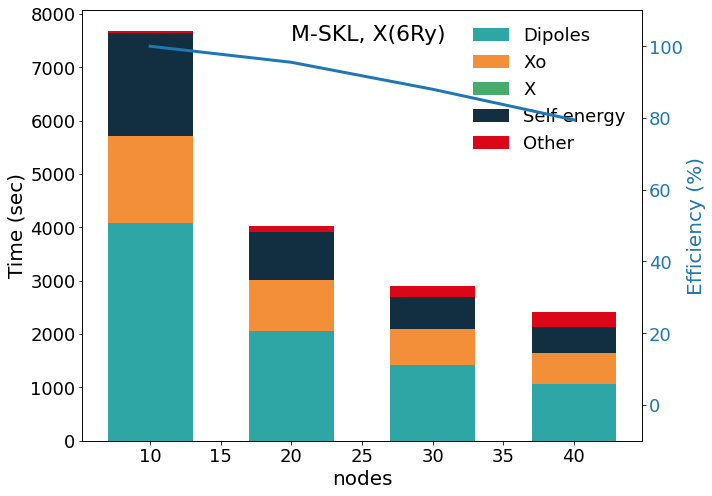

In [10]:
color1='#112F41'
color2='#2EA6A6'
color3='#47AB6C'
color4='#F28F38'
color5='#D90718'

residue=scaling['WALL_TIME']-scaling['dip']-scaling['Xo']-scaling['X']-scaling['Sgm_x']-scaling['Sgm_c']
sigma = scaling['Sgm_c']+scaling['Sgm_x']

fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_xlabel('nodes',fontsize=20)
ax1.set_ylabel('Time (sec)',fontsize=20)
ax1.bar(scaling['nodes'],scaling['dip']  ,width=6,color=color2,label='Dipoles')
ax1.bar(scaling['nodes'],scaling['Xo']   ,width=6,color=color4,label='Xo', bottom=scaling['dip'])
ax1.bar(scaling['nodes'],scaling['X']    ,width=6,color=color3,label='X',bottom=scaling['dip']+scaling['Xo'] )
ax1.bar(scaling['nodes'],sigma           ,width=6,color=color1,label='Self energy',bottom=scaling['dip']+scaling['Xo']+scaling['X'])
ax1.bar(scaling['nodes'],residue         ,width=6,color=color5,label='Other',bottom=scaling['dip']+scaling['Xo']+scaling['X']+sigma)
#fig.xticks(scaling['nodes'])
ax1.legend( )
ax1.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax1.legend(fontsize='18',framealpha=0.0)
ax1.text(20, 7500, r'M-SKL, X(6Ry)', fontsize=22)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([-10, 110])
ax2.set_ylabel('Efficiency (%)', color='tab:blue',fontsize=20)  # we already handled the x-label with ax1
ax2.plot(scaling['nodes'], scaling['efficiency'], linewidth=3, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=18)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.title('Scaling - ecut=10Ry', fontsize=20)
plt.savefig('scaling.pdf')
plt.show()

In [11]:
scaling['node_h'] = scaling['nodes'] * scaling['WALL_TIME'] / 3600

In [12]:
scaling

ncores  MPI  threads   dip         Xo  Xo_REDUX       X  X_REDUX    io_X  \
0     480  240        2  4080  1630.0000  650.0000  2.3356   2.5491  0.9488   
1     960  480        2  2059   952.0000  377.6646  2.3840   2.5969  0.9764   
2    1440  720        2  1412   683.0000  288.6414  2.3786   2.6215  1.3467   
3    1920  960        2  1072   564.3314  225.4401  2.3478   2.6153  0.9579   

    io_WF    Sgm_x  (REDUX)      Sgm_c  (REDUX).1  WALL_TIME  nodes  ideal  \
0  5.5523  55.5403   1.9577  1875.0000   468.9006       7680     10    1.0   
1  3.8909  34.2691  11.7901   870.0000   188.5393       4020     20    2.0   
2  3.8274  24.3935  12.5493   563.4003    94.7114       2909     30    3.0   
3  3.8525  23.4496  11.8449   463.5434   121.1674       2416     40    4.0   

    speedup  efficiency     node_h  
0  1.000000  100.000000  21.333333  
1  1.910448   95.522388  22.333333  
2  2.640083   88.002750  24.241667  
3  3.178808   79.470199  26.844444

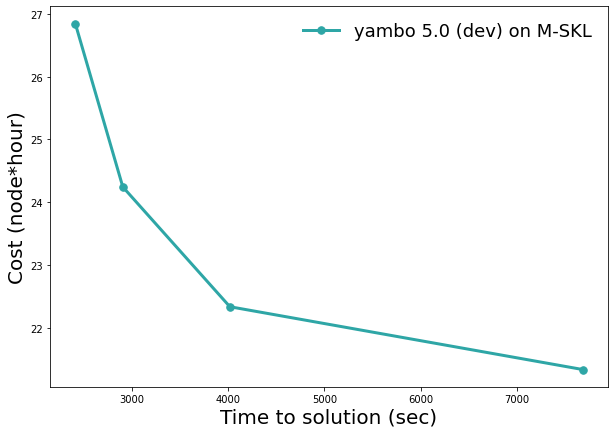

In [14]:
fig2, ax3 = plt.subplots(figsize=(10, 7))
ax3.set_xlabel('Time to solution (sec)',fontsize=20)
ax3.set_ylabel('Cost (node*hour)',fontsize=20)
ax3.plot(scaling['WALL_TIME'], scaling['node_h'], 
         linewidth=3, color=color2, marker='.', markersize=15,
         label='yambo 5.0 (dev) on M-SKL')
#ax3.set_ylim([0, 2.25])
ax3.legend()
ax3.legend(fontsize='18',framealpha=0.0)

plt.savefig('cost.pdf')
plt.show()

In [15]:
scaling.WALL_TIME

0    7680
1    4020
2    2909
3    2416
Name: WALL_TIME, dtype: int64

In [16]:
scaling.node_h

0    21.333333
1    22.333333
2    24.241667
3    26.844444
Name: node_h, dtype: float64

In [18]:
scaling[['nodes', 'WALL_TIME', 'node_h']].to_csv('cost_y5.0_mskl_6ry.csv')